## CNV heatmap of intersted genes

In [1]:
library(Seurat)
library(infercnv)
setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()

Attaching SeuratObject



[1] "/media/inspur/AS2150G2/LDK/sclc_metastasis"

In [2]:
# load infercnv output  
read.delim("/media/inspur/AS2150G2/LDK/sclc_metastasis/infercnv_res/output_dir_i3/infercnv.20_HMM_predHMMi3.hmm_mode-samples.Pnorm_0.5.repr_intensities.observations.txt",sep=" ",row.names=1)->CNV_SCLC


In [3]:
# load suerat object
load("data_out/2.SCLC.filter.rdata")
ls()

table(SCLC.filter$celltype, SCLC.filter$orig.ident)
table(Idents(SCLC.filter))


[1] "CNV_SCLC"    "SCLC.filter"

                
                   S1   S2   S3   S4   S5   S6   S7
  tumor          1587 2601   38 2330   74 4896  377
  CD4T             89  155  407   93  832  520  291
  Monocytes        63  475 1018  117  310  138   42
  Neutrophils      19  278 1920   47  107   61   15
  CD8T             88  107  614   25  390  211   76
  NK               71  208 1165   24  202  237   46
  B cells          12   68  345   34   26  115  198
  Megakaryocytes    2   10  184   35   17    7    2
  Macrophages      12   58   11   20   24  120  133
  DC                4   17   35    9   67   27    6
  Plasma            2   15   25    4   26   29   18


         tumor           CD4T      Monocytes    Neutrophils           CD8T 
         11903           2387           2163           2447           1511 
            NK        B cells Megakaryocytes    Macrophages             DC 
          1953            798            257            378            165 
        Plasma 
           119 

In [4]:
subset(SCLC.filter@meta.data,celltype=="tumor" & orig.ident=="S1")->S1_cols
subset(SCLC.filter@meta.data,celltype=="tumor" & orig.ident=="S2")->S2_cols
subset(SCLC.filter@meta.data,celltype=="tumor" & orig.ident=="S3")->S3_cols
subset(SCLC.filter@meta.data,celltype=="tumor" & orig.ident=="S4")->S4_cols
subset(SCLC.filter@meta.data,celltype=="tumor" & orig.ident=="S5")->S5_cols
subset(SCLC.filter@meta.data,celltype=="tumor" & orig.ident=="S6")->S6_cols
subset(SCLC.filter@meta.data,celltype=="tumor" & orig.ident=="S7")->S7_cols


In [5]:
c("B2M","CALR","CD207","CD36","CHUK","CLEC4A","CYBA","CYBB","FCER1G","FCGR1A","FCGR1B","HLA-E","HLA-F","HLA-G","HLA-H","IFI30","IKBKB",
  "IKBKG","ITGAV","ITGB5","LNPEP","NCF1","NCF2","NCF4","PDIA3","PSMA1","PSMA2","PSMA3","PSMA4","PSMA5","PSMA6","PSMA7","PSMA8","PSMB1",
  "PSMB10","PSMB11","PSMB2","PSMB3","PSMB4","PSMB5","PSMB6","PSMB7","PSMB8","PSMB9","PSMC1","PSMC2","PSMC3","PSMC4","PSMC5","PSMC6","PSMD1",
  "PSMD10","PSMD11","PSMD12","PSMD13","PSMD14","PSMD2","PSMD3","PSMD4","PSMD5","PSMD6","PSMD7","PSMD8","PSMD9","PSME1","PSME2","PSME3","PSME4",
  "PSMF1","SEC22B","SNAP23","TAP1","TAP2","TAPBP","VAMP3","VAMP8","ACE","AZGP1","B2M","BCAP31","CALR","CANX","CD207","CD36","CHUK","CLEC4A",
  "CYBA","CYBB","ERAP1","ERAP2","FCER1G","FCGR1A","FCGR1B","FCGRT","HFE","HLA-E","HLA-F","HLA-G","HLA-H","IDE","IFI30","IKBKB","IKBKG","ITGAV",
  "ITGB5","LNPEP","MICA","MICB","MR1","NCF1","NCF2","NCF4","PDIA3","PSMA1","PSMA2","PSMA3","PSMA4","PSMA5","PSMA6","PSMA7","PSMA8","PSMB1",
  "PSMB10","PSMB11","PSMB2","PSMB3","PSMB4","PSMB5","PSMB6","PSMB7","PSMB8","PSMB9","PSMC1","PSMC2","PSMC3","PSMC4","PSMC5","PSMC6","PSMD1",
  "PSMD10","PSMD11","PSMD12","PSMD13","PSMD14","PSMD2","PSMD3","PSMD4","PSMD5","PSMD6","PSMD7","PSMD8","PSMD9","PSME1","PSME2","PSME3","PSME4",
  "PSMF1","SAR1B","SEC13","SEC22B","SEC23A","SEC24A","SEC24B","SEC24C","SEC24D","SEC31A","SNAP23","TAP1","TAP2","TAPBP","TAPBPL","VAMP3","VAMP8")->MHC


In [6]:
list(rownames(S1_cols), rownames(S2_cols), rownames(S3_cols), rownames(S4_cols), rownames(S5_cols), rownames(S6_cols), rownames(S7_cols))->list_cells

In [7]:
colnames(CNV_SCLC) <- gsub("\\.", "\\-", colnames(CNV_SCLC))
head(colnames(CNV_SCLC))

[1] "S1_GCAGCCAAGTTCCGGC-1" "S1_TCTGCCATCTATACGG-1" "S1_AGTGCCGGTGATACAA-1"
[4] "S1_GTTAGACAGGTGCTGA-1" "S1_ACGGAAGTCCAATCCC-1" "S1_GTCTGTCTCCGCAAAT-1"

In [8]:

merge_genes=c()
for( i in 1:7)
{
  ss=unlist(list_cells[[i]])
  merge_genes =cbind(merge_genes ,rowMeans(CNV_SCLC[intersect(unique(MHC),rownames(CNV_SCLC)),ss]))
}


In [9]:
colnames(merge_genes)<-paste0("S",1:7)
library(pheatmap)

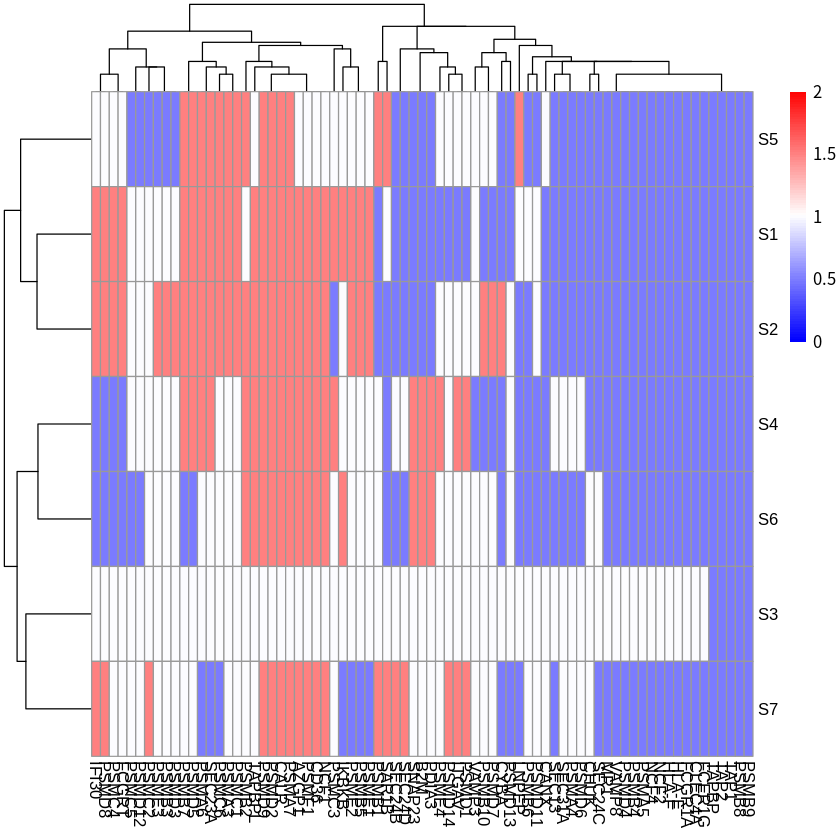

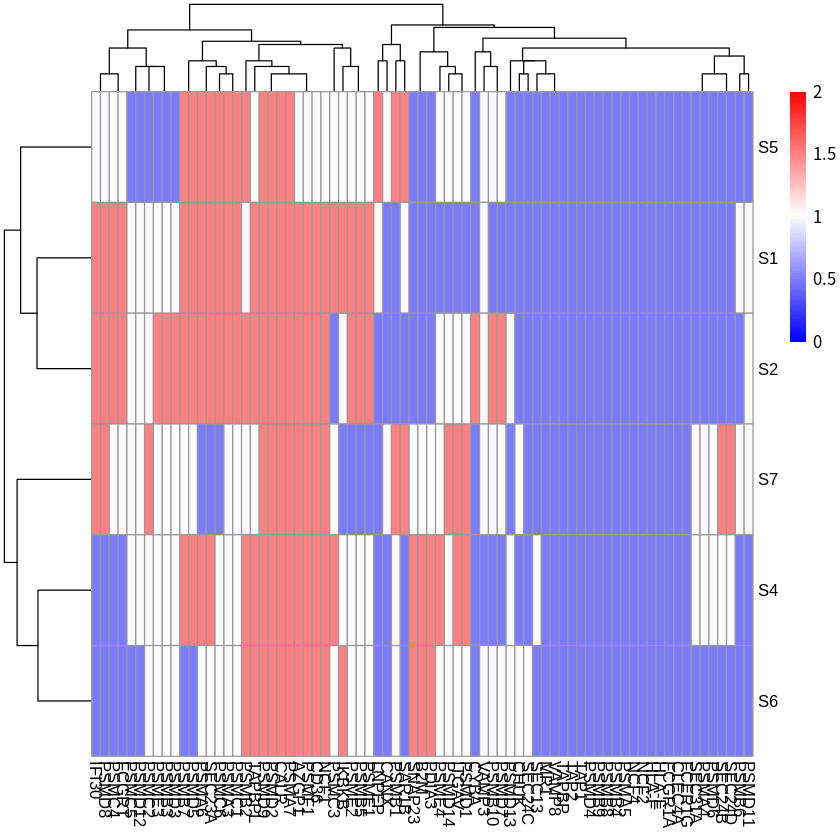

In [14]:
# pdf(file = "plot/03/MHC cnv heatmap.pdf", width = 8, height = 4.5)
pheatmap(t(merge_genes),breaks=seq(0,2,length.out=100),color=colorRampPalette(c("blue","white", "red"))(100))
pheatmap(t(merge_genes)[c('S1','S2','S4','S5','S6','S7'),],breaks=seq(0,2,length.out=100),color=colorRampPalette(c("blue","white", "red"))(100))
# dev.off()

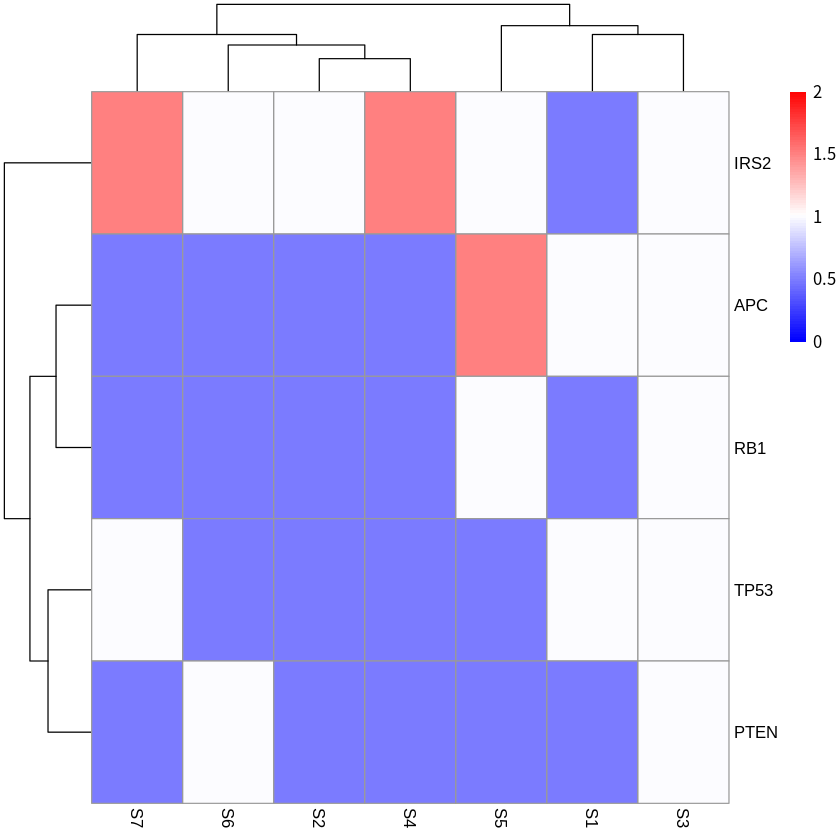

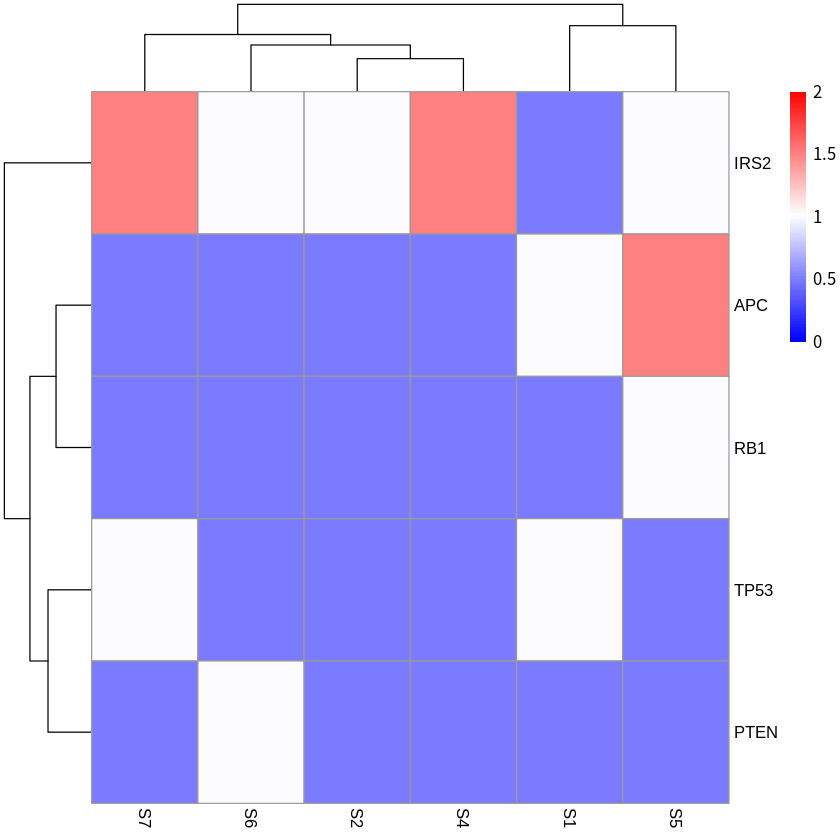

In [19]:
genes <- c("IRS2", "APC",  "RB1", "TP53", "PTEN")

merge_genes=c()
for( i in 1:7)
{
  ss=unlist(list_cells[[i]])
  merge_genes =cbind(merge_genes ,rowMeans(CNV_SCLC[intersect(unique(genes),rownames(CNV_SCLC)),ss]))
}

colnames(merge_genes)<-paste0("S",1:7)
library(pheatmap)
pheatmap(merge_genes,breaks=seq(0,2,length.out=100),color=colorRampPalette(c("blue","white", "red"))(100))
pheatmap(merge_genes[,c('S1','S2','S4','S5','S6','S7')],breaks=seq(0,2,length.out=100),color=colorRampPalette(c("blue","white", "red"))(100))


In [20]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] pheatmap_1.0.12    infercnv_1.10.1    SeuratObject_4.0.4 Seurat_4.0.6      

loaded via a namespace (and not attached):
  [1] uuid_1.0-3                  plyr_1.8.6                 
  [3] igraph_1.2.10               repr_1.1.3                 
  [5] lazyeval_0.2.2              splines_4.1.2       